In [1]:
import random
import numpy as np
import pandas as pd
from __future__ import division
from sklearn import preprocessing
import matplotlib.pyplot as plt

%matplotlib inline  

# Iterative Least Mean Squares

In [2]:
linear_DB = pd.read_csv("linear_reg/reglin.csv")
linear_DB = linear_DB.sample(frac=1)
size = int(len(linear_DB) * .75)
train = linear_DB[0:size]
test = linear_DB[size:len(linear_DB)]


In [3]:
def iterativeLeastMeanSquares(x, y, eta): 
    # x must be a pandas data frame
    
    x = (x - np.mean(x)) / np.std(x)
    y = (y - np.mean(y)) / np.std(y)
    
    x_0 = 1
    w_0 = 1
    
    w_s = np.ones(1)
    
    for i in range(63*len(x)):
        i = i % len(x)
        x_i = x.iloc[i]
        y_i = y.iloc[i]
        
        V_x = sum(w_s * x_i) + w_0
        
        w_0 = w_0 + eta * (y_i - V_x)
        w_s = w_s + (eta * (y_i - V_x)) * x_i
        
        # import pdb; pdb.set_trace()
        
    return  [w_0, w_s[0]]


In [4]:
IMS_clf = iterativeLeastMeanSquares(test['X'], test['y'], 0.1)
print IMS_clf

[-0.020378308263914582, 0.96710689097239666]


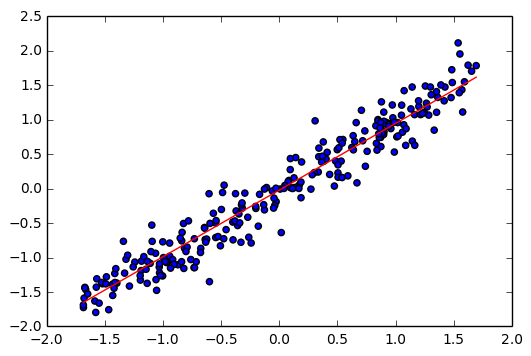

In [5]:
xplot = (test['X'] - np.mean(train['X'])) / np.std(train['X'])
yplot = (test['y'] - np.mean(train['y'])) / np.std(train['y'])

plt.scatter(xplot, yplot)
x = np.linspace(min(xplot),max(xplot),1000)
y = IMS_clf[0] + IMS_clf[1] * x
plt.plot(x,y, 'r')

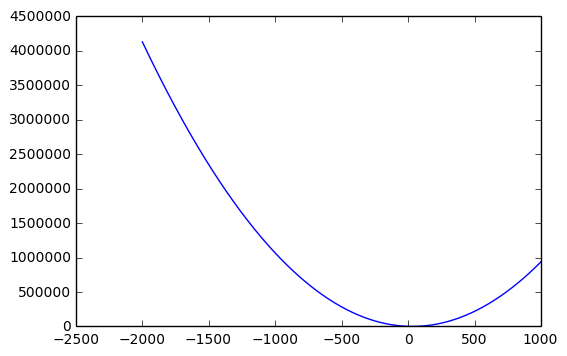

In [6]:
wo_s = np.linspace(IMS_clf[0] - 2000 , IMS_clf[0] + 1000, 1000)
mse = []
for wo in wo_s: 
    mse += [np.mean((test['y'] - (wo + IMS_clf[1] * (xplot)))**2)]
plt.plot(wo_s,mse)

## Matrix form and SGD

In [7]:
import random as rnd

linear_DB = pd.read_csv("linear_reg/regLinPoli.csv")
linear_DB

rnd.seed(83117)

linear_DB = linear_DB.sample(frac=1)
size = int(len(linear_DB) * .75)
train = linear_DB[0:size]
test = linear_DB[size:len(linear_DB)]

## Preprocessing data

In [8]:
scaler_x = preprocessing.StandardScaler().fit(test[test.columns[0:-1]])

train_scaledX = scaler_x.transform(test[test.columns[0:-1]])
test_scaledX = scaler_x.transform(test[test.columns[0:-1]])
print len(test_scaledX)

train_scaledy = (train['y'] - np.mean(train['y'])) / np.std(train['y'])
test_scaledy = (test['y'] - np.mean(train['y'])) / np.std(train['y'])
print len(test['y'])


258
258


In [9]:
def SGD(x, y, eta): 
    # x must be a numpy.ndarray
    
    x_0 = 1
    w_0 = 1
    
    w_s = np.ones(len(x[0]))
    
    for i in range(100*len(x[0])):
        #import pdb; pdb.set_trace()

        i = i % len(x[0])
        x_i = x[i]
        y_i = y.iloc[i]
        V_x = w_s.dot(x_i) + w_0
        
        w_0 = w_0 + eta * (y_i - V_x)
        w_s = w_s + ((eta * (y_i - V_x)) * x_i)
        
        
    return  [w_0] + w_s

def MSE(w, testx, testy):
    return np.mean(testx.dot(w) - testy.values)

In [12]:
IMS_clf = SGD(train_scaledX, train_scaledy, 0.1)
print IMS_clf

[ 1.44499637  1.21588828  2.729255   -0.37332708  1.7517146 ]


In [13]:
MSE(IMS_clf, test_scaledX, test_scaledy)

0.014674138690700155

In [14]:
def SGDRidge(x, y, eta, lmbda): 
    # x must be a numpy.ndarray
    
    x_0 = 1
    w_0 = 1
    
    w_s = np.ones(len(x[0]))
    
    for i in range(100*len(x[0])):
        #import pdb; pdb.set_trace()

        i = i % len(x[0])
        x_i = x[i]
        y_i = y.iloc[i]
        V_x = w_s.dot(x_i) + w_0
        
        w_0 = w_0 + eta * (y_i - V_x)
        w_s = w_s + ((eta * (y_i - V_x)) * x_i) - (lmbda * w_s)
        
        
    return  [w_0] + w_s

Error for $\lambda = 0$

In [16]:
IMS_clf = SGDRidge(train_scaledX, train_scaledy, 0.1, 0)
print IMS_clf
print MSE(IMS_clf, test_scaledX, test_scaledy)

[ 1.44499637  1.21588828  2.729255   -0.37332708  1.7517146 ]
0.0146741386907


Error for $\lambda = 0.1$

In [18]:
IMS_clf = SGDRidge(train_scaledX, train_scaledy, 0.1, 0.1)
print IMS_clf
print MSE(IMS_clf, test_scaledX, test_scaledy)

[ 0.46282732  0.4915119   0.44509192  0.35972588  0.49169331]
0.0146741386907
